качаем библиотеки

In [1]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t

#### Проект
Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [2]:
### для загрузки данных
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

**Задача 1**<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [3]:
print(f"product1:\n -среднее арифметическое:{np.mean(product1)}    медианa:{np.median(product1)}    модa:{statistics.mode(product1)}")
print(f"product2:\n -среднее арифметическое:{np.mean(product2)}    медианa:{np.median(product2)}    модa:{statistics.mode(product2)}")

product1:
 -среднее арифметическое:199.103    медианa:198.5    модa:186
product2:
 -среднее арифметическое:193.5    медианa:194.5    модa:227


Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

**Ответ**<br>
* **Мода** из трех метрик будет наименее показательной. Потому что при большом количестве возможных значений, мода как мера центральной тенденции становится менее показательной.
* На основе оставшихся двух метрик **product1** в среднем приносит больше выручки.

**Задача 2**<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [4]:
print(f"стандартное отклонение product1:{np.std(product1)}\nстандартное отклонение product2:{np.std(product2)}")

стандартное отклонение product1:28.793964489107783
стандартное отклонение product2:29.589018233121557


**Ответ**<br>
* Оценка продукта **product1** является более точной.

**Задача 3**<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

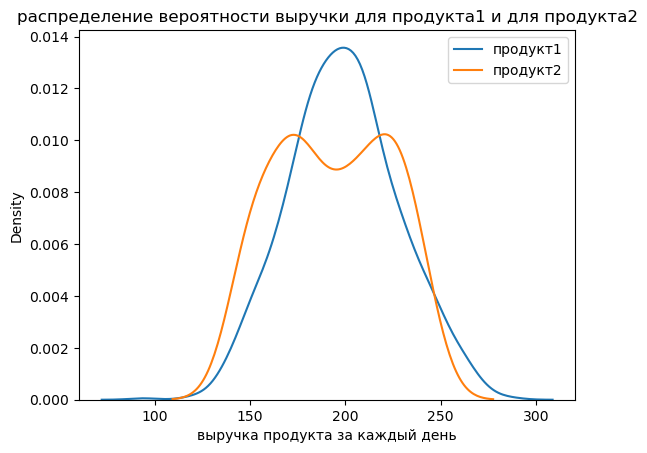

In [5]:
sns.kdeplot(product1, label='продукт1')
sns.kdeplot(product2, label='продукт2')
plt.title('распределение вероятности выручки для продукта1 и для продукта2')
plt.xlabel('выручка продукта за каждый день')
plt.legend()
plt.show()

**Задача 4**<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [6]:
print(f"Product1:\n Min:{min(product1)}    Max:{max(product2)}    Range:{max(product1)-min(product1)}")
print(f"Product2:\n Min:{min(product2)}    Max:{max(product2)}    Range:{max(product2)-min(product2)}")

Product1:
 Min:94    Max:242    Range:193
Product2:
 Min:145    Max:242    Range:97


**Ответ**<br>
* Не сходится. В обеих выборках есть **выбросы** которые искажают значения.

**Задача 5**<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [7]:
q1_p1 = np.percentile(product1,25)
q3_p1 = np.percentile(product1,75)

q1_p2 = np.percentile(product2,25)
q3_p2 = np.percentile(product2,75)

print(f"Product1 IQR:{q3_p1-q1_p1}")
print(f"Product2 IQR:{q3_p2-q1_p2}")

Product1 IQR:38.25
Product2 IQR:51.0


**Ответ**<br>
* Можно увидеть прямую корреляцию между межквартильным размахом и стандартным отклонением.

**Задача 6**<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

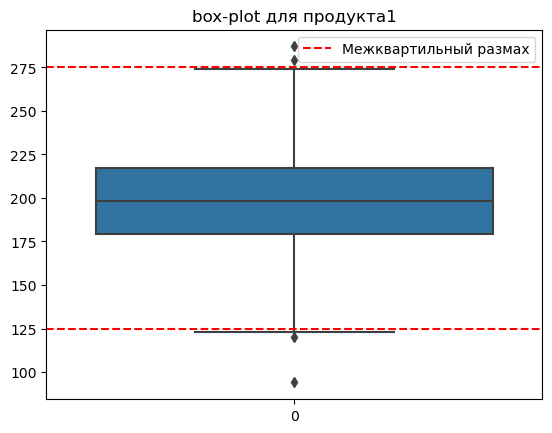

В интервалах ниже 94 и выше 287 начинаются выбросы.


In [8]:
sns.boxplot(product1)
plt.title('box-plot для продукта1')
plt.axhline(275, color='red', linestyle='--', label = 'Межквартильный размах')
plt.axhline(125, color='red', linestyle='--')
plt.legend(loc=1)
plt.show()

print(f"В интервалах ниже {min(product1)} и выше {max(product1)} начинаются выбросы.")

**Задача 7**<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

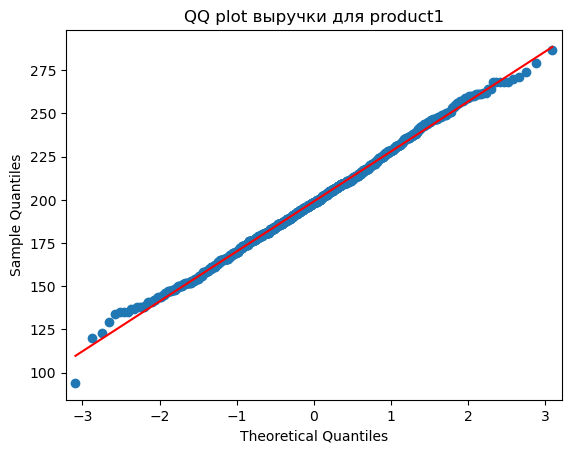

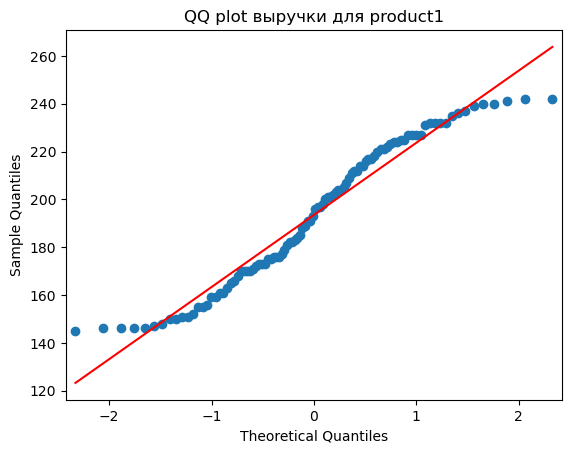

In [9]:
sm.qqplot(np.array(product1),line='r')
plt.title('QQ plot выручки для product1')
sm.qqplot(np.array(product2),line='r')
plt.title('QQ plot выручки для product1')
plt.show()

**Ответ**<br>
* 1 из распределений является нормальным

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

**Ответ**<br>
* Не достает близких к среднему значений значения.

**Задача 8**<br>
И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [10]:
mean = np.mean(product1)
std = np.std(product1)

data = product1 - mean
data = data/std
print(f"Mean:{data.mean()}; Std:{data.std()}")

Mean:-3.0553337637684306e-16; Std:0.9999999999999999


Нарисуйте kdeplot нового стандартного распределения

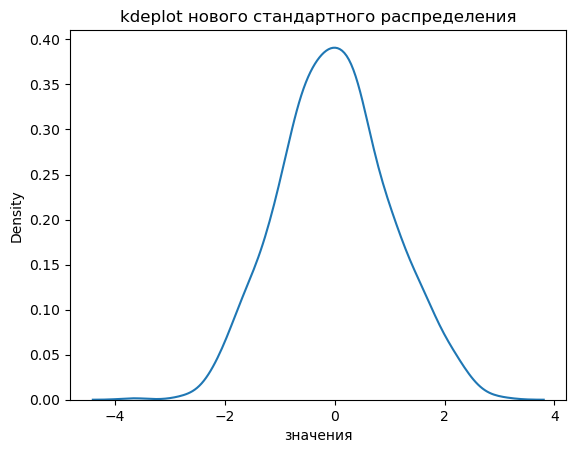

In [11]:
sns.kdeplot(data)
plt.title('kdeplot нового стандартного распределения')
plt.xlabel('значения')
plt.show()

**Задача 9**<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

In [12]:
p1 = norm.ppf(0.01,data.mean(),data.std())
print(f"точку слева от которой будет 1% всей вероятности распределения:{p1}")

точку слева от которой будет 1% всей вероятности распределения:-2.3263478740408408


Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?

**Ответ**<br>
* Значение -3.65 стала новым минимумом данного стандартного нормального распределения а также данное чилсло входит в 1% всей вероятности распределения.

**Задача 10**<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [13]:
print(f"точечная оценка средней выручки продукта2:{np.mean(product2)}")

точечная оценка средней выручки продукта2:193.5


Подсчитайте 95% доверительный интервал

In [16]:
ul = norm.ppf(0.975,np.mean(product2),np.std(product2))
ll = norm.ppf(0.025,np.mean(product2),np.std(product2))
print(f"95% доверительный интервал:{round(ll,1)}-{round(ul,1)} или {ul-ll}")

95% доверительный интервал:135.5-251.5 или 115.98682014963447


**Задача11**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

In [19]:
test_mean1 = np.mean(product1)
threshold = 197.5
test_std1 = np.std(product1)
probability = 1 - norm.cdf(threshold,loc=test_mean,scale=test_std)
print(f"АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5:{probability}, соответсвенно мы не отвергаем гипотезу")


АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5:0.5221982038223387, соответсвенно мы не отвергаем гипотезу


Какой это был типа АБ теста?

**Ответ**<br>
* выборка vs значение; one tail

**Задача12**<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [20]:
test_mean2 = np.mean(product2)
test_std2 = np.std(product2)


test_size1 = len(product1)
test_size2 = len(product2)

dof = test_size1 + test_size2 - 2

err_diff = np.sqrt(test_std1**2/test_size1 + test_std2**2/test_size2)
diff_mean = test_mean1 - test_mean2

t_stat = diff_mean / err_diff

probability = t.cdf(t_stat, dof)
print(f"АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны:{probability}")

АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны:0.9647039026579673
